In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pylab as plt
#import seaborn as sns
import glob
import sys
import pandas as pd
import math
import os
import os.path

In [3]:
#change "npz_path" for the new folder just created
#DO NOT USE as npz_path the folder with all the .npz files in the memory bank, they are too many and it could get confusing
    #example for windows: 
        #npz_path = 'C:/Users/cecil/Desktop/New folder/'
npz_path = '/home/ceci/data/foraging/'
video_names = glob.glob(npz_path + '*.npz')
nind = 1
fr = 30

In [4]:
print(len(video_names))

4


In [7]:
#do not change shit
key_list = ['time','frame','X#wcentroid','timestamp','frame', 'ANGLE','Y#wcentroid',\
            'BORDER_DISTANCE#pcentroid','SPEED#wcentroid','ACCELERATION#wcentroid']

for videofile in video_names[0:]:

    with np.load(videofile) as data:
        m = {}

        for k in key_list:
            m[k] = data[k]
    df = pd.DataFrame(m)
    split_data = os.path.basename(videofile).split('_')
    df['ID'] = split_data[1]
    df['trial'] = split_data[2]
    df['season'] = split_data[0]
    #this rename the colums
    df = df.rename(columns={'X#wcentroid': 'x','Y#wcentroid': 'y','SPEED#wcentroid': 'speed',\
                            'ACCELERATION#wcentroid': 'acceleration'})
    #Interpolate nans for x and y
    #df['x'] = df['x'].interpolate(method = "linear")
    #df['y'] = df['y'].interpolate(method = "linear")
    #df.loc[df['speed']>50] = np.nan
    #this reorder the columns
    df = df[['ID', 'trial', 'season', 'time', 'frame', 'x', 'y', 'ANGLE', 'speed', 'acceleration']]
    
    if not os.path.isdir(os.path.join(os.path.dirname(videofile),'csv')):
        os.mkdir(os.path.join(os.path.dirname(videofile),'csv'))
    #save the df to .csv file in the same path where the .npz are
    
    df.to_csv(os.path.join(os.path.dirname(videofile), 'csv', os.path.basename(videofile.replace('.npz', '.csv'))),\
             index=False)

In [6]:
df['x'].isna().sum()

0

In [6]:
from scipy.signal import savgol_filter

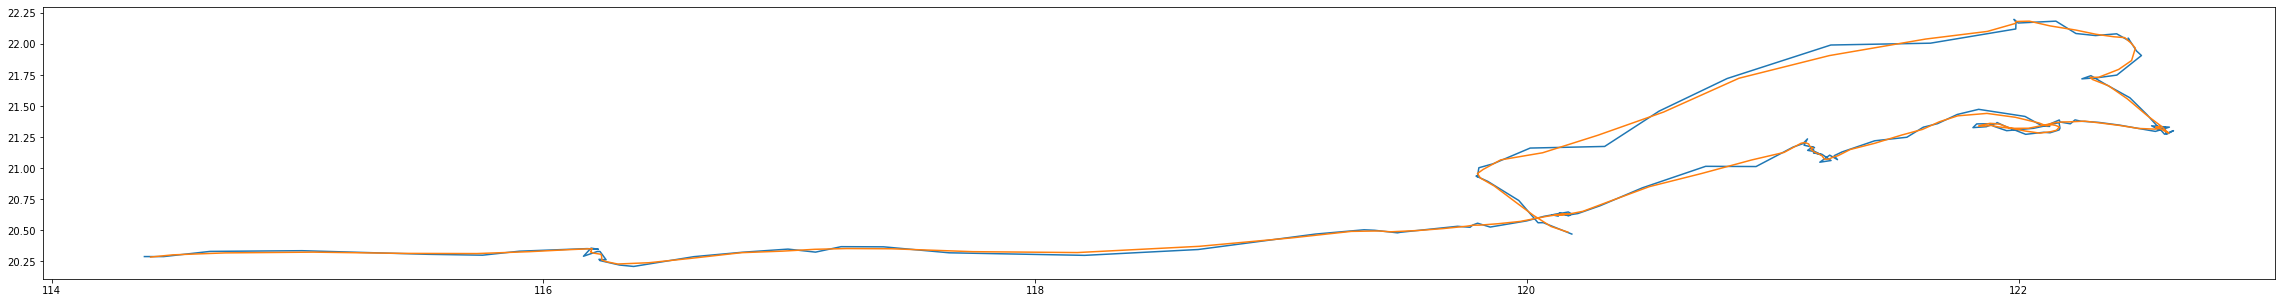

In [32]:
plt.figure(figsize=(40,5))
plt.plot(df['x'][0:150],df['y'][0:150])
smooth_x = savgol_filter(df['x'],3,polyorder=1)
smooth_y = savgol_filter(df['y'],3,polyorder=1)
plt.plot(smooth_x[0:150],smooth_y[0:150])

In [38]:
dx = np.diff(df['x'])
dy = np.diff(df['y'])
speed_new = np.sqrt(dx**2 + dy**2) / (1/30)
s  = np.append(np.nan,speed_new)

In [48]:
dx = np.diff(smooth_x)
dy = np.diff(smooth_y)
speed_new_s = np.sqrt(dx**2 + dy**2) / (1/30)
ss  = np.append(np.nan,speed_new_s)

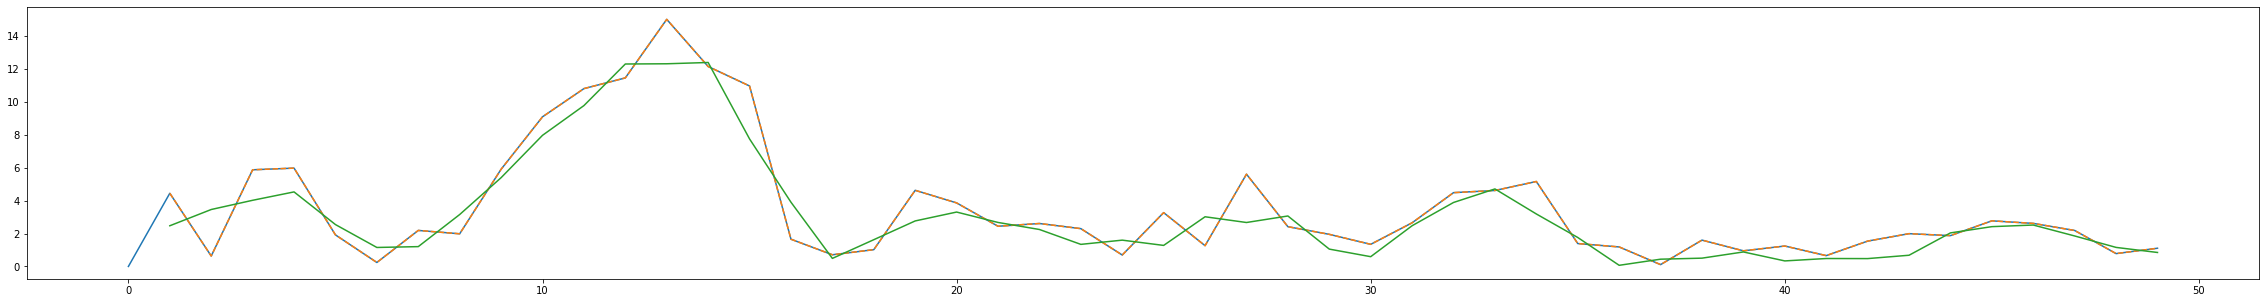

In [49]:
plt.figure(figsize=(40,5))
plt.plot(df['speed'][0:50])
plt.plot(s[0:50],linestyle='--')
plt.plot(ss[0:50])

(array([3.876e+03, 9.850e+02, 7.870e+02, 7.080e+02, 5.980e+02, 3.560e+02,
        1.340e+02, 3.500e+01, 5.000e+00, 1.000e+00]),
 array([ 0.       ,  5.3580055, 10.716011 , 16.074017 , 21.432022 ,
        26.790028 , 32.148033 , 37.50604  , 42.864044 , 48.22205  ,
        53.580055 ], dtype=float32),
 <BarContainer object of 10 artists>)

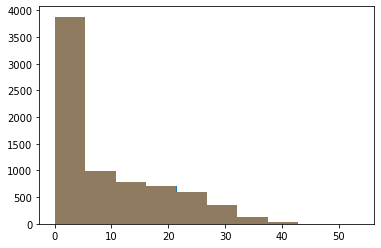

In [50]:
plt.hist(s)
plt.hist(df['speed'],alpha=0.5)

In [ ]:
#Save the df to .csv file in the same path where the .npz are
#val = df.to_csv(npz_path + info[0] + '.csv')
#val
